In [1]:
import setGPU

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('../scripts')
from data_reading import *
from autoencoder_architectures import * 

setGPU: Setting GPU to: 0


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

### Experiment with public datasets, autoencoder architecture built using simple dense layers

In [2]:
""" create objects of datasets and load dataset"""
data_obj = public_datasets()
x_train, y_train, x_test, y_test = data_obj.load_cifar_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 3072) (50000, 1) (10000, 3072) (10000, 1)


### visualize a sample

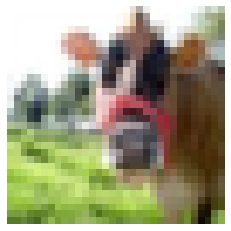

In [3]:
w = h = 32
plt.imshow(x_train[0].reshape(w, h, 3))
plt.axis('off')
plt.show()

In [4]:
""" create dense archs class object and choose arhitecture type """
latent_dim = 128
den_ae = dense_archs(x_train.shape[1], 3)
autoencoder, encoder = den_ae.undercomp_ae_arch(latent_dim)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
""" start training here """
history = autoencoder.fit(x_train, x_train, epochs=50, verbose=2)

Epoch 1/50
50000/50000 - 6s - loss: 0.0340 - acc: 0.0025
Epoch 2/50
50000/50000 - 5s - loss: 0.0184 - acc: 0.0040
Epoch 3/50
50000/50000 - 5s - loss: 0.0151 - acc: 0.0051
Epoch 4/50
50000/50000 - 5s - loss: 0.0134 - acc: 0.0063
Epoch 5/50
50000/50000 - 5s - loss: 0.0122 - acc: 0.0074
Epoch 6/50
50000/50000 - 5s - loss: 0.0113 - acc: 0.0092
Epoch 7/50
50000/50000 - 5s - loss: 0.0106 - acc: 0.0101
Epoch 8/50
50000/50000 - 5s - loss: 0.0100 - acc: 0.0104
Epoch 9/50
50000/50000 - 5s - loss: 0.0095 - acc: 0.0117
Epoch 10/50
50000/50000 - 5s - loss: 0.0091 - acc: 0.0122
Epoch 11/50
50000/50000 - 5s - loss: 0.0087 - acc: 0.0136
Epoch 12/50
50000/50000 - 5s - loss: 0.0084 - acc: 0.0139
Epoch 13/50
50000/50000 - 5s - loss: 0.0082 - acc: 0.0143
Epoch 14/50
50000/50000 - 5s - loss: 0.0079 - acc: 0.0150
Epoch 15/50
50000/50000 - 5s - loss: 0.0077 - acc: 0.0158
Epoch 16/50
50000/50000 - 5s - loss: 0.0075 - acc: 0.0161
Epoch 17/50
50000/50000 - 5s - loss: 0.0074 - acc: 0.0167
Epoch 18/50
50000/50000

In [6]:
""" plot model history using this function """
def plot_history(history, metrics):
    plt.subplot(1, 2, 1)
    plt.plot(history.history[metrics])
    plt.title('Model accuracy'), plt.ylabel('accuracy'), plt.xlabel('epoch')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.title('Model loss'), plt.ylabel('loss'), plt.xlabel('epoch')
    plt.tight_layout()

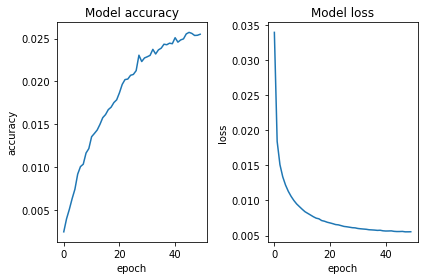

In [7]:
plot_history(history, 'acc')

In [8]:
latent_codings = encoder.predict(x_test)
print(latent_codings.shape)
recont_codings = autoencoder.predict(x_test)
print(recont_codings.shape)

(10000, 128)
(10000, 3072)


In [9]:
def display_original_reconstructed_images(n, images, predictions):
    plt.figure(figsize=(24,4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        if i == 0:
            plt.title('original_images', fontsize=18)
        plt.imshow(images[i].reshape(32, 32, 3), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i+1+n)
        if i == 0:
            plt.title('reconstructed_images', fontsize=18)
        plt.imshow(predictions[i].reshape(32, 32, 3), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


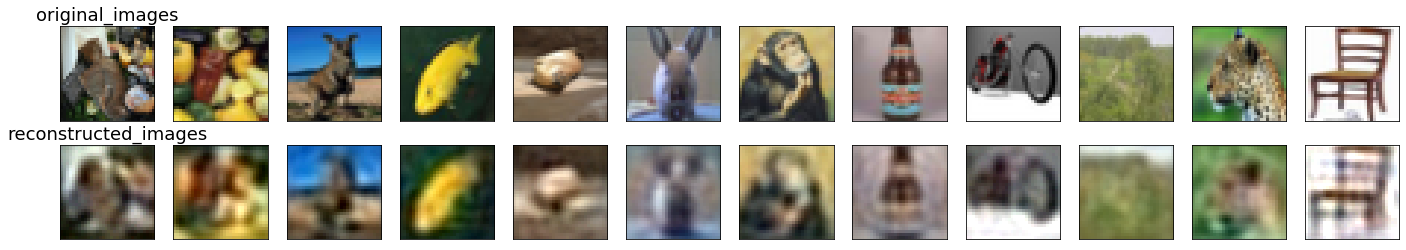

In [10]:
num_images = 12
original_images = []
reconstructed_images = []
for ind in range(num_images):
    rInd = np.random.randint(0, x_test.shape[0]-1)
    original_images.append((x_test[rInd]*255).astype(np.uint8))
    reconstructed_images.append(recont_codings[rInd])
    
display_original_reconstructed_images(num_images, original_images, reconstructed_images)

In [21]:
def display_encoder_embeddings(images, enw, enh):
    encoded_imgs = encoder.predict(images)
    print(encoded_imgs.shape)
    n = 10
    plt.figure(figsize=(20, 8))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(encoded_imgs[i].reshape(enw, enh).T, cmap='gray') # 3 layer network
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

(10000, 128)


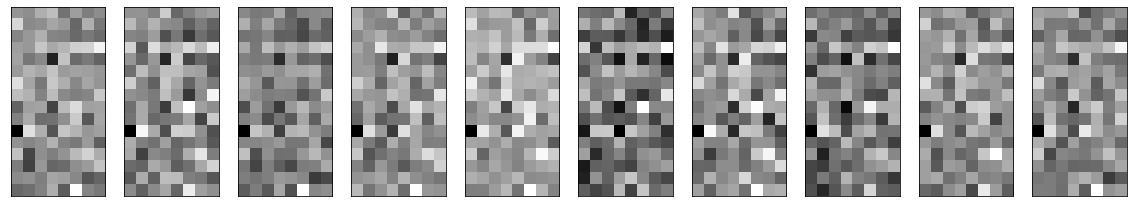

In [12]:
display_encoder_embeddings(x_train[:100], 8, 16)

### Experimenting with a stacked/deep autoencoder

In [13]:
ndata_obj = public_datasets(False)
x_train_full, y_train_full, xr_test, yr_test = ndata_obj.load_cifar_data()

xr_train = x_train_full[:-5000]
xr_valid = x_train_full[-5000:]

yr_train = y_train_full[:-5000]
yr_valid = y_train_full[-5000:]

print(x_train_full.shape, xr_train.shape, yr_train.shape)

(50000, 32, 32, 3) (45000, 32, 32, 3) (45000, 1)


In [14]:
narch_obj = dense_archs(xr_train.shape[1:], 3)
ae, encoder = narch_obj.stacked_ae_arch()
history = ae.fit(xr_train, xr_train, epochs=50, validation_data=(xr_valid, xr_valid), verbose=2)
print(xr_train.shape[1:])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 - 9s - loss: 0.6258 - __rounded_accuracy: 0.7340 - val_loss: 0.5968 - val___rounded_accuracy: 0.7943
Epoch 2/50
45000/45000 - 9s - loss: 0.5935 - __rounded_accuracy: 0.8048 - val_loss: 0.5827 - val___rounded_accuracy: 0.8262
Epoch 3/50
45000/45000 - 9s - loss: 0.5841 - __rounded_accuracy: 0.8240 - val_loss: 0.5778 - val___rounded_accuracy: 0.8357
Epoch 4/50
45000/45000 - 9s - loss: 0.5791 - __rounded_accuracy: 0.8339 - val_loss: 0.5789 - val___rounded_accuracy: 0.8285
Epoch 5/50
45000/45000 - 9s - loss: 0.5757 - __rounded_accuracy: 0.8406 - val_loss: 0.5709 - val___rounded_accuracy: 0.8489
Epoch 6/50
45000/45000 - 9s - loss: 0.5738 - __rounded_accuracy: 0.8446 - val_loss: 0.5949 - val___rounded_accuracy: 0.8049
Epoch 7/50
45000/45000 - 9s - loss: 0.5723 - __rounded_accuracy: 0.8476 - val_loss: 0.5684 - val___rounded_accura

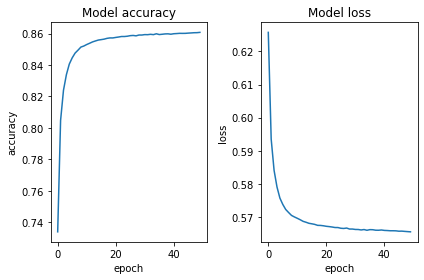

In [15]:
plot_history(history, "__rounded_accuracy")

In [16]:
latent_codings = encoder.predict(xr_test)
print(latent_codings.shape)
recont_codings = ae.predict(xr_test)
print(recont_codings.shape)

(10000, 30)
(10000, 32, 32, 3)


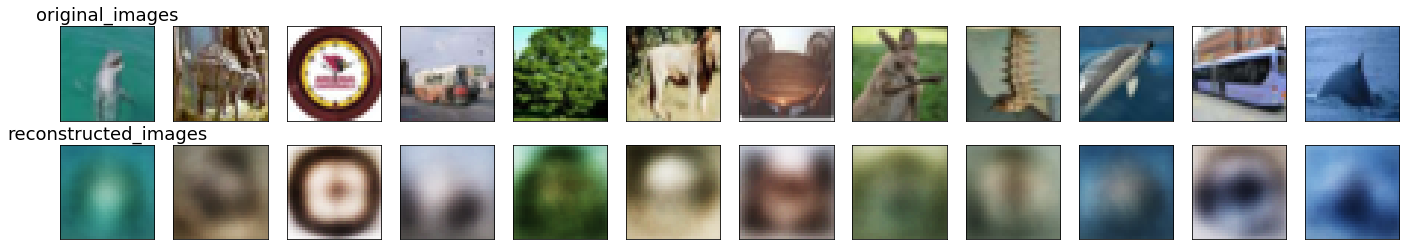

In [17]:
num_images = 12
original_images = []
reconstructed_images = []
for ind in range(num_images):
    rInd = np.random.randint(0, xr_test.shape[0]-1)
    original_images.append(xr_test[rInd])
    reconstructed_images.append(recont_codings[rInd])
    
display_original_reconstructed_images(num_images, original_images, reconstructed_images)

(45000, 32, 32, 3)
(100, 30)


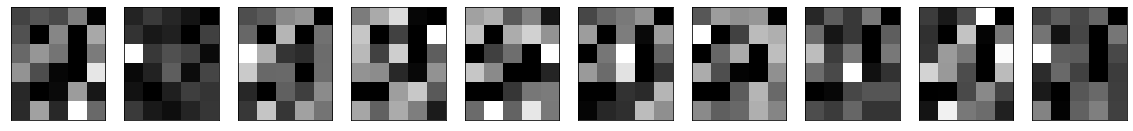

In [22]:
print(xr_train.shape[:100])
display_encoder_embeddings(xr_train[:100], 5, 6)

In [39]:
from sklearn.manifold import TSNE
import matplotlib as mpl

In [24]:
x_compressed = encoder.predict(xr_valid)
tsne = TSNE()
xr_valid_2d = tsne.fit_transform(x_compressed)
xr_valid_2d = (xr_valid_2d - xr_valid_2d.min()) /(xr_valid_2d.max() - xr_valid_2d.min())

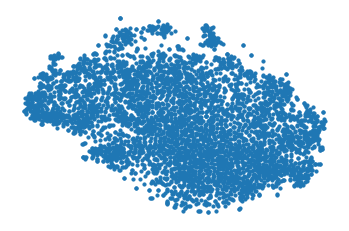

In [35]:
plt.scatter(xr_valid_2d[:, 0], xr_valid_2d[:, 1], s=10, cmap="tab10")
plt.axis("off")
plt.show()

ValueError: Invalid RGBA argument: array([[0.09019608, 0.74509804, 0.81176471, 1.        ]])

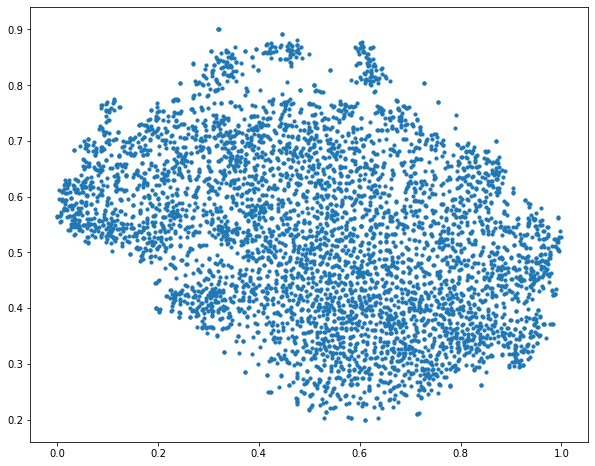

In [43]:
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(xr_valid_2d[:, 0], xr_valid_2d[:, 1], s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(xr_valid_2d):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(xr_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(yr_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()